In [10]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.decomposition import PCA
import numpy as np
from sklearn.manifold import TSNE
from sklearn.cluster import AgglomerativeClustering
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns

### Load Dataset
Dataset link: https://www.kaggle.com/datasets/blastchar/telco-customer-churn

In [4]:
dataset = pd.read_csv("Processed_dataset.csv")

### Normalization (if needed)

In [5]:
scaler = MinMaxScaler()
normalized_dataset = scaler.fit_transform(dataset)
normalized_dataset = pd.DataFrame(normalized_dataset, columns=dataset.columns)
normalized_dataset

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,...,StreamingMovies_No,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,1.0,0.0,1.0,0.0,0.000000,0.0,1.0,0.115423,0.001275,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.0,0.0,0.0,0.0,0.464789,1.0,0.0,0.385075,0.215867,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
2,0.0,0.0,0.0,0.0,0.014085,1.0,1.0,0.354229,0.010310,1.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.0,0.0,0.0,0.0,0.619718,0.0,0.0,0.239303,0.210241,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
4,1.0,0.0,0.0,0.0,0.014085,1.0,1.0,0.521891,0.015330,1.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7027,0.0,0.0,1.0,1.0,0.323944,1.0,1.0,0.662189,0.227521,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
7028,1.0,0.0,1.0,1.0,1.000000,1.0,1.0,0.845274,0.847461,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
7029,1.0,0.0,1.0,1.0,0.140845,0.0,1.0,0.112935,0.037809,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
7030,0.0,1.0,1.0,0.0,0.042254,1.0,1.0,0.558706,0.033210,1.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0


### PCA (Principal Component Analysis)

#### 2 Dim PCA

In [6]:
pca = PCA(n_components=2)
dataset_2dim = pca.fit_transform(normalized_dataset)
print(f"Original shape: {dataset.shape}")
print(f"PCA transformed shape: {dataset_2dim.shape}")

Original shape: (7032, 41)
PCA transformed shape: (7032, 2)


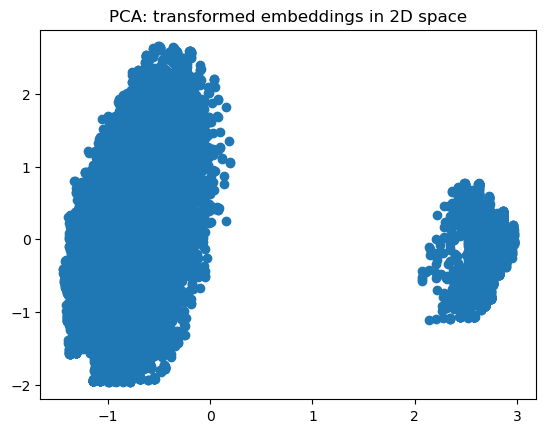

In [7]:
plt.scatter(dataset_2dim[:, 0], dataset_2dim[:, 1])
plt.title("PCA: transformed embeddings in 2D space")
plt.show()

### Apply Agglomerative Clustering to Dataset

In [13]:
clustering = AgglomerativeClustering(n_clusters=4).fit(dataset)

In [14]:
clustering.labels_

array([0, 0, 0, ..., 0, 0, 2], dtype=int64)

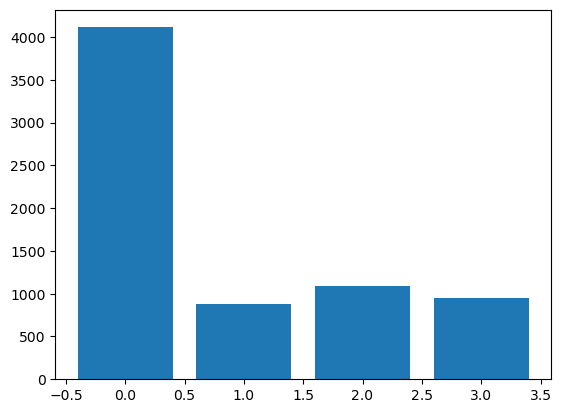

In [15]:
labels,counts = np.unique(clustering.labels_,return_counts=True)
x = labels
y = counts

plt.bar(x,y)
plt.show()

In [16]:
TSNE_2d = TSNE(n_components=2).fit_transform(dataset)

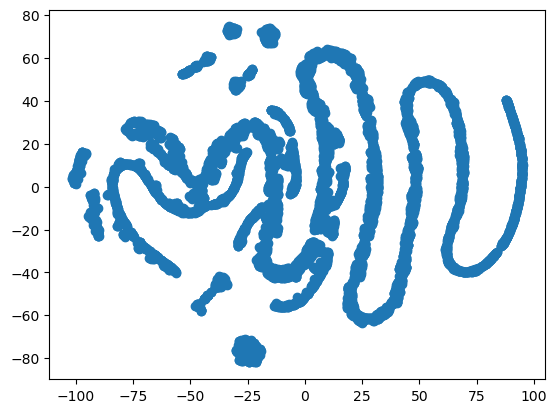

In [17]:
plt.scatter(TSNE_2d[:,0], TSNE_2d[:,1])

[Text(0.5, 1.0, 'Agglomerative t-SNE Visualization')]

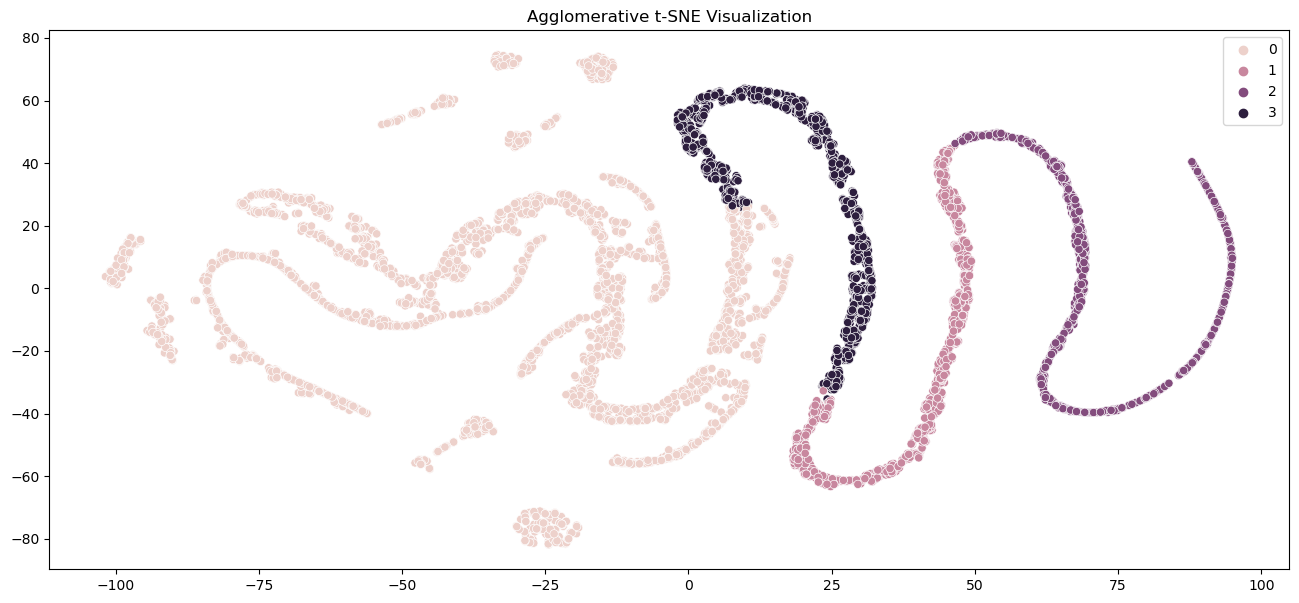

In [20]:
plt.figure(figsize=(16,7)),
sns.scatterplot(x=TSNE_2d[:,0],y=TSNE_2d[:,1],hue=clustering.labels_).set(title='Agglomerative t-SNE Visualization')